In [1]:
import numpy as np
import tensorflow as tf

In [2]:
# Cifar10データロード
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [3]:
# 正規化
x_train = x_train/255.0
x_test = x_test/255.0

In [4]:
# CNN構築
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(
        24, 3, activation='relu', padding='same',
        input_shape=(32, 32, 3)),  # (32, 32, 24)
    tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'),  # (30, 30, 32)
    tf.keras.layers.MaxPooling2D(pool_size=2, strides=2, padding='valid'), # (15, 15, 32)
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', padding='same'),  # (15, 15, 64)
    tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'),  # (13, 13, 64)
    tf.keras.layers.MaxPooling2D(pool_size=2, strides=2, padding='valid'), # (6, 6, 64)
    tf.keras.layers.Dropout(0.25),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Activation('softmax')
])

In [5]:
# モデル可視化
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 24)        672       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 32)        6944      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 13, 32)        18464     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 32)          0

In [6]:
# モデルチェックポイントのコールバック
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    '02_cnn_cifar10.hdf5', verbose=1, save_weights_only=False)

In [7]:
# モデルコンパイル
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [8]:
# 訓練
model.fit(
    x_train,
    y_train,
    epochs=15,
    validation_data=(x_test, y_test),
    callbacks=[cp_callback]
)

Train on 50000 samples, validate on 10000 samples
Epoch 1/15
49984/50000 [============================>.] - ETA: 0s - loss: 1.8353 - accuracy: 0.3756
Epoch 00001: saving model to 02_cnn_cifar10.hdf5
50000/50000 [==============================] - 28s 562us/sample - loss: 1.8352 - accuracy: 0.3756 - val_loss: 1.4789 - val_accuracy: 0.5169
Epoch 2/15
49952/50000 [============================>.] - ETA: 0s - loss: 1.4451 - accuracy: 0.5325
Epoch 00002: saving model to 02_cnn_cifar10.hdf5
50000/50000 [==============================] - 24s 489us/sample - loss: 1.4448 - accuracy: 0.5326 - val_loss: 1.3073 - val_accuracy: 0.5950
Epoch 3/15
49888/50000 [============================>.] - ETA: 0s - loss: 1.3026 - accuracy: 0.5886
Epoch 00003: saving model to 02_cnn_cifar10.hdf5
50000/50000 [==============================] - 24s 479us/sample - loss: 1.3022 - accuracy: 0.5887 - val_loss: 1.0867 - val_accuracy: 0.6547
Epoch 4/15
49888/50000 [============================>.] - ETA: 0s - loss: 1.1329 - 

In [9]:
# モデル評価
val_loss, val_acc = model.evaluate(x_test, y_test, batch_size=128)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [10]:
# 保存したモデルのロード
load_model = tf.keras.models.load_model("02_cnn_cifar10.hdf5")

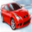

In [11]:
# テスト画像を1枚ロード
from IPython.display import Image, display_png
from PIL import Image

img = Image.open('image/automobile10.png')
img = img.resize((32, 32))
display_png(img)

In [12]:
# 入力画像成形、および正規化
x = np.asarray(img)
x = x.reshape(-1, 32, 32, 3)
x = x.astype('float32')
x /= 255

In [13]:
# 推論実行
predict_result = load_model.predict(x)

In [14]:
print(predict_result)
print(np.squeeze(predict_result)) # 不要な次元を削除
print(np.argmax(np.squeeze(predict_result)))

[[4.2369322e-10 9.9984813e-01 2.0877855e-11 2.0877855e-11 2.0877855e-11
  2.0877855e-11 2.0877855e-11 2.0877855e-11 9.7019448e-11 1.5185351e-04]]
[4.2369322e-10 9.9984813e-01 2.0877855e-11 2.0877855e-11 2.0877855e-11
 2.0877855e-11 2.0877855e-11 2.0877855e-11 9.7019448e-11 1.5185351e-04]
1
